In [143]:
##### Audio Classification Using Machine Learning

In [144]:
!pip install librosa


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ashit\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
filename='UrbanSound8K/dog_bark.wav'

In [147]:
import IPython.display as ipd
import librosa
import librosa.display

In [148]:
!dir

 Volume in drive D is Btech
 Volume Serial Number is DABD-A54F

 Directory of D:\Newwww Internship resume and cover letter\More pnts of project

23.10.24  22:09    <DIR>          .
23.10.24  22:02    <DIR>          ..
23.10.24  15:32    <DIR>          .ipynb_checkpoints
23.10.24  22:09         2,203,385 Audio classifier.ipynb
23.10.24  21:33    <DIR>          saved_models
23.10.24  21:55    <DIR>          UrbanSound8K
               1 File(s)      2,203,385 bytes
               5 Dir(s)  480,374,599,680 bytes free


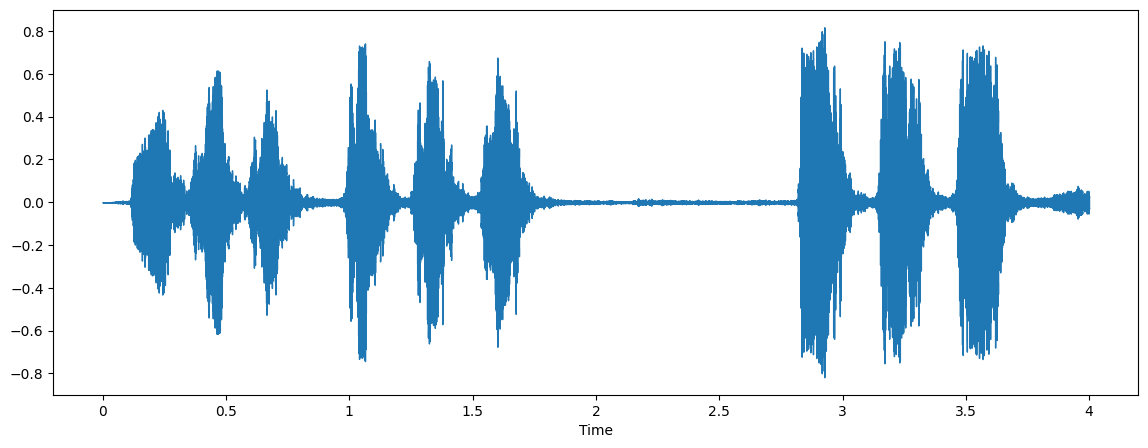

In [149]:
plt.figure(figsize=(14, 5))

# Load the audio file
data, sample_rate = librosa.load(filename)

librosa.display.waveshow(data, sr=sample_rate)

# Display the audio
import IPython.display as ipd
ipd.Audio(filename)


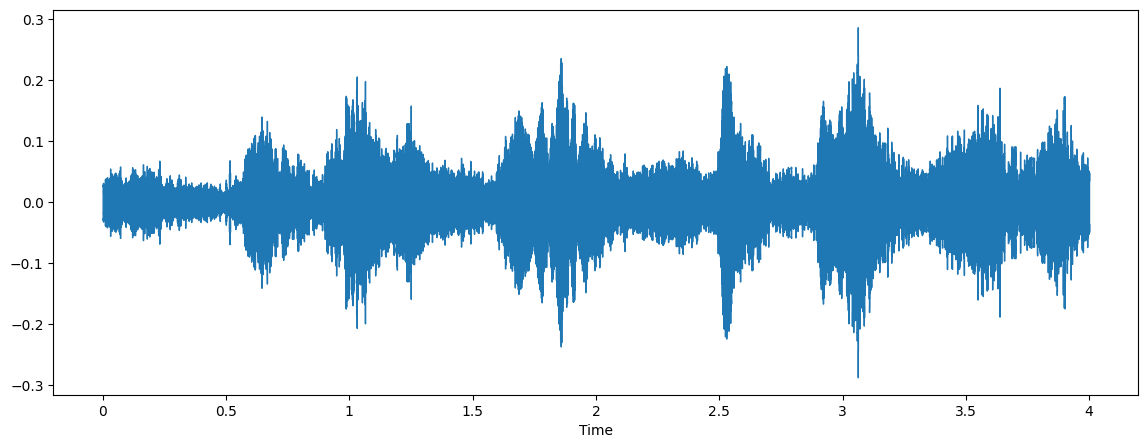

In [150]:
filename2='UrbanSound8K/childrn.wav'
plt.figure(figsize=(14, 5))

# Load the audio file
data, sample_rate = librosa.load(filename2)

librosa.display.waveshow(data, sr=sample_rate)

# Display the audio
import IPython.display as ipd
ipd.Audio(filename2)


In [151]:
sample_rate

22050

In [152]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio= wav.read(filename)

In [153]:
wave_sample_rate

44100

In [154]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [ -51, -349],
       [ -39, -282],
       [ -90, -322]], dtype=int16)

In [155]:
import pandas as pd 

metadata= pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [156]:
### Check whether the data is imbalanced 
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [157]:
import librosa
audio_file_path='UrbanSound8K/childrn.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [158]:
print(librosa_audio_data)

[ 0.01280061  0.01735493  0.01070389 ... -0.04559733 -0.03756189
 -0.02354791]


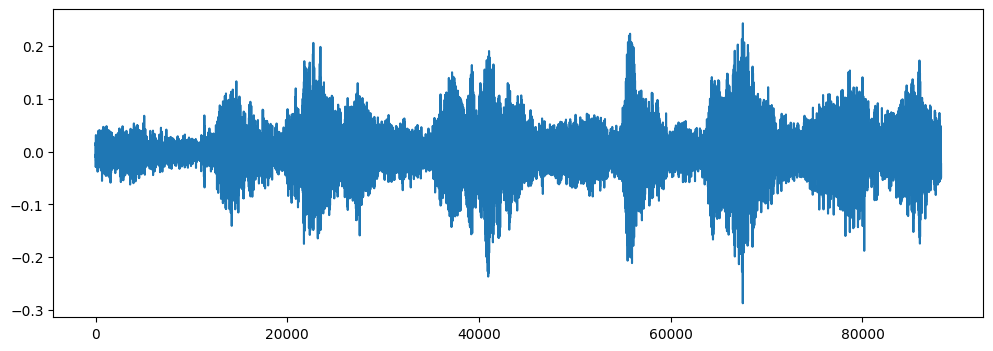

In [159]:
### plotting the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

### Librosa converts the signal to mono channel (channel will always be 1)

In [160]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [161]:
wave_audio

array([[   28,  1147],
       [    7,  1087],
       [  -61,  1079],
       ...,
       [-1615,  -469],
       [-1401,  -154],
       [-1137,   239]], dtype=int16)

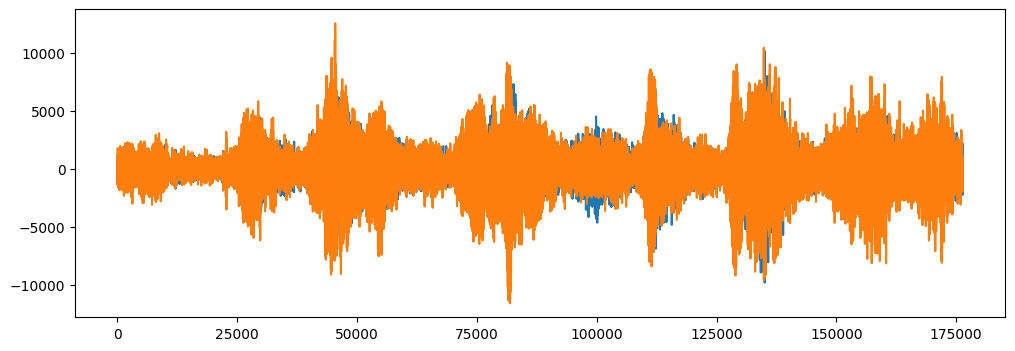

In [162]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [163]:
# Extract Features
### Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [164]:
mfccs

array([[-3.1651913e+02, -2.9376910e+02, -3.0610318e+02, ...,
        -2.2225681e+02, -2.3476350e+02, -2.5561893e+02],
       [ 1.2457605e+02,  1.3033710e+02,  1.3106383e+02, ...,
         1.3104633e+02,  1.3364854e+02,  1.3761470e+02],
       [-1.5323290e+01, -2.2754906e+01, -2.9505499e+01, ...,
        -6.7750122e+01, -5.9698563e+01, -4.7452370e+01],
       ...,
       [ 8.9124012e+00,  1.2690090e+01,  6.8890777e+00, ...,
        -2.8367639e-02,  2.8887463e-01,  1.9054788e-01],
       [-7.0917606e+00, -8.6288986e+00, -4.5115261e+00, ...,
         5.4197674e+00,  4.0893087e+00,  8.1903849e+00],
       [-9.9260902e+00, -1.3883022e+01, -1.6143852e+01, ...,
         2.6504736e+00,  4.3602986e+00,  2.2367332e+00]], dtype=float32)

In [165]:
pip install resampy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ashit\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [166]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [167]:
#return mfccs_scaled_features
def features_extractor(file):
    try:
        audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features
    except Exception as e:
        print(f"Error loading {file}: {e}")
        return None  # Return None if there's an error

In [168]:
import numpy as np
from tqdm import tqdm
import os
import pandas as pd

# Assuming `metadata` is already defined and `features_extractor` is implemented

# List to hold extracted features
extracted_features = []

# Iterate through each audio file and extract features
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(audio_dataset_path, 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    
    # Initialize final class label
    final_class_labels = row["class"]
    
    try:
        # Extract features
        data = features_extractor(file_name)
        if data is not None:  # Only append if data is valid
            extracted_features.append([data, final_class_labels])
    except Exception as e:
        continue  # Continue to the next file if there was an error

# Now extracted_features will contain only valid data


1955it [02:50, 13.15it/s]C:\Users\ashit\AppData\Local\Temp\ipykernel_7528\778350332.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
C:\Users\ashit\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
1961it [02:50, 18.00it/s]

Error loading UrbanSound8K/audio/fold2\147672-3-1-0.wav: [Errno 2] No such file or directory: 'UrbanSound8K/audio/fold2\\147672-3-1-0.wav'


3555it [04:59, 14.63it/s]C:\Users\ashit\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
6130it [08:20, 16.70it/s]

Error loading UrbanSound8K/audio/fold2\33849-3-4-0.wav: [Errno 2] No such file or directory: 'UrbanSound8K/audio/fold2\\33849-3-4-0.wav'


8325it [11:04, 21.37it/s]C:\Users\ashit\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\ashit\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8595it [11:23, 13.93it/s]

Error loading UrbanSound8K/audio/fold2\97193-3-0-0.wav: [Errno 2] No such file or directory: 'UrbanSound8K/audio/fold2\\97193-3-0-0.wav'


8732it [11:32, 12.61it/s]


In [170]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [171]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [172]:
X.shape

(8729, 40)

In [173]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [174]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [175]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [176]:

### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [177]:
X_train

array([[-3.8458615e+02,  1.4784848e+02, -3.1554943e+01, ...,
        -6.5656799e-01,  1.8495264e+00, -3.4627435e+00],
       [-9.0177704e+01,  9.1889168e+01, -1.2617806e+00, ...,
         8.3781934e-01, -3.9212379e+00, -1.7750126e-01],
       [-6.2083549e+01,  2.3321201e+01, -4.3302540e+01, ...,
         5.3602872e+00,  1.8612992e+00,  7.2672119e+00],
       ...,
       [-5.1031506e+02,  8.8003441e+01, -5.0260024e+00, ...,
         2.6184419e-01, -3.4046844e-01, -1.6456898e+00],
       [-1.4970909e+02,  1.3877531e+02, -3.2041759e+01, ...,
         4.4479036e-01, -1.5592482e+00, -1.4206839e+00],
       [-4.2598709e+02,  2.0875258e+02,  1.5893010e+00, ...,
        -3.8170173e+00, -1.4100366e+00, -3.9495075e-01]], dtype=float32)

In [178]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [179]:
X_train.shape

(6983, 40)

In [180]:
X_test.shape

(1746, 40)

In [181]:
y_train.shape

(6983, 10)

In [182]:
y_test.shape

(1746, 10)

In [183]:
# Model Creation

In [184]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [185]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [186]:
### No of classes
num_labels=y.shape[1]

In [187]:
model = Sequential()
### first layer
model.add(Input(shape=(40,)))  # Define the input layer separately
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [188]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [190]:
## Trianing my model
from keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

# Update the filepath to use the `.keras` extension
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1191 - loss: 22.4072
Epoch 1: val_loss improved from inf to 2.28694, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.1191 - loss: 22.3568 - val_accuracy: 0.1237 - val_loss: 2.2869
Epoch 2/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1306 - loss: 2.6977
Epoch 2: val_loss improved from 2.28694 to 2.27699, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1306 - loss: 2.6965 - val_accuracy: 0.1266 - val_loss: 2.2770
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1380 - loss: 2.3723
Epoch 3: val_loss improved from 2.27699 to 2.25589, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1379 - loss: 2.3722 - val_accuracy: 0.1460 - val_loss: 2.2559
Epoch 4/100
213/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 

In [191]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7560137510299683


In [192]:

prediction_feature.shape

(1, 40)

In [193]:

X_test[1]

array([-266.59137  ,  100.524445 ,   15.724101 ,   54.248917 ,
        -16.518059 ,   26.999228 ,   17.416925 ,   29.240257 ,
         -1.5154874,   14.868355 ,   -8.718472 ,   11.630485 ,
         -1.6951529,   -3.3350556,   -6.1254473,   11.706334 ,
        -10.046017 ,    6.479155 ,   -3.477755 ,    1.1949449,
         -7.1029644,    4.879883 ,   -9.29332  ,    2.2983758,
         -6.2723584,   -1.5304837,   -6.8616223,    1.8849196,
         -3.498073 ,   -2.4762459,   -7.2422156,   -1.6469204,
         -4.6738005,   -2.3061836,   -3.611214 ,   -1.9577799,
         -4.170142 ,   -1.2379652,   -0.40672  ,   -2.7058566],
      dtype=float32)

In [194]:
import numpy as np

# Predict class probabilities for X_test
predictions = model.predict(X_test)

# Get the predicted class by finding the index of the max probability
predicted_classes = np.argmax(predictions, axis=1)

# Output the predicted class labels as an integer array
print(predicted_classes)



55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[8 5 8 ... 9 0 7]


In [197]:
# Testing Some Test Audio Data
## Steps
### Preprocess the new audio data
### predict the classes
### Invere transform your Predicted Label

In [198]:
import numpy as np

# Load and process the audio file
filename = "UrbanSound8K/drilling.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 

# Extract MFCC features and scale them
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

# Reshape the features for model input
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Predict class probabilities
predictions = model.predict(mfccs_scaled_features)

# Get the predicted class by finding the index of the max probability
predicted_label = np.argmax(predictions, axis=1)

# Inverse transform to get the original class label
prediction_class = labelencoder.inverse_transform(predicted_label)

print("Predicted class:", prediction_class[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted class: engine_idling


In [199]:
import numpy as np

# Load and process the audio file
filename = "UrbanSound8K/horn.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 

# Extract MFCC features and scale them
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
print(mfccs_scaled_features)

# Reshape the features for model input
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
# Predict class probabilities
predictions = model.predict(mfccs_scaled_features)

# Get the predicted class by finding the index of the max probability
predicted_label = np.argmax(predictions, axis=1)

# Inverse transform to get the original class label
prediction_class = labelencoder.inverse_transform(predicted_label)

print("Predicted class:", prediction_class[0])


[-150.73366    145.76523    -25.115541    36.394035    -4.0796347
   19.160433    -5.8402357   16.400103   -11.330558    13.610887
  -12.263452     5.799075    -6.583117    10.247754     2.7349465
   15.731241     1.5043184    9.023962    -7.7469735   -2.5640054
  -15.446888    -5.2590246   -5.198105     4.232454    -7.8886666
   -6.1956043   -1.8701705    8.9922695   -5.4557676  -11.591044
   -1.1382673   16.576061     8.829584    -6.558752    -4.936531
   -3.1355016  -10.404193    -2.3165224   15.552281     7.394286 ]
[[-150.73366    145.76523    -25.115541    36.394035    -4.0796347
    19.160433    -5.8402357   16.400103   -11.330558    13.610887
   -12.263452     5.799075    -6.583117    10.247754     2.7349465
    15.731241     1.5043184    9.023962    -7.7469735   -2.5640054
   -15.446888    -5.2590246   -5.198105     4.232454    -7.8886666
    -6.1956043   -1.8701705    8.9922695   -5.4557676  -11.591044
    -1.1382673   16.576061     8.829584    -6.558752    -4.936531
    -3.1